In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
from skimage import io, color, transform, feature
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using BinaryClassificationPerformance v1.03


In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |
 |  Performance measures to evaluate the fit of a binary classification model, v1.03
 |
 |  Methods defined here:
 |
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



### file paths and names

In [3]:
ci_path = 'plane_data/cropped_images/' # file path for cropped images for training
l_file = 'plane_data/plane_labels.csv' # file path and file name for csv with labels

# Function for feature building and extraction on photographs¶

scikit-image documentation on methods used for feature extraction:  

* http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2gray  
* http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize  
* http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

In [4]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
dims = (60, 140) #dimension 

In [5]:
# # Canny edge detector parameters
# def image_manipulation(imname, imgs_path, imview=False):
#     warnings.filterwarnings('ignore')
#     imname = imgs_path + imname + '.png'
#     img_raw = io.imread(imname, as_gray=True) ##turn image into grayscale (or not?)
#     downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
#     final_image = feature.canny(downscaled) # detect edge' to filter image with Canny algorithm
#     if imview==True:
#         io.imshow(final_image)
#     warnings.filterwarnings('always')
#     return final_image

# # test the function, look at input/output
# test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
# print('downscaled image shape: ')
# print(test_image.shape)
# print('image representation (first row of pixels): ')
# print(test_image[0])
# print('\n')
# print('example of transformation: ')

downscaled image shape: 
(60, 140)
image representation (first row of pixels): 
[6.03233224e-03 7.26204340e-03 1.86077452e-02 1.65709409e-02
 8.76889403e-03 1.30718954e-02 1.47891614e-02 1.58218542e-02
 1.56956515e-02 9.70996481e-03 4.62161295e-03 7.62215934e-03
 1.06920091e-02 7.05552711e-03 9.24322590e-04 4.71313892e-03
 2.43108136e-03 3.71885003e-03 2.96694677e-02 2.86483909e-02
 0.00000000e+00 0.00000000e+00 1.99930976e-04 2.24745112e-03
 2.92296468e-03 1.30718954e-03 5.14607359e-03 5.14607359e-03
 2.77296777e-03 5.54593554e-03 7.12985473e-03 7.12985473e-03
 5.54593554e-03 2.77296777e-03 1.18904858e-03 1.18904858e-03
 2.77296777e-03 4.90653893e-18 5.54593554e-03 5.54593554e-03
 7.91904136e-03 1.06920091e-02 5.54593554e-03 0.00000000e+00
 1.18523599e-02 3.12817092e-02 2.13396441e-02 1.48180184e-02
 2.61457585e-02 7.71487858e-03 4.23602305e-03 1.33458364e-02
 2.51102911e-02 1.96078431e-02 2.77296777e-03 1.25721464e-02
 1.03342407e-02 7.45212696e-03 5.62243482e-03 3.69729036e-03
 2.06

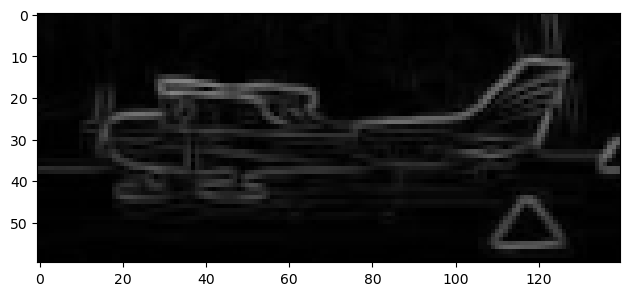

In [6]:
from skimage import io, transform, filters, color
import warnings
# prewitt edge detector parameters

def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname)

    # Check if the image has alpha channel
    if img_raw.ndim == 3 and img_raw.shape[2] == 4:
        img_raw = img_raw[:, :, :3]  # Remove the alpha channel

    downscaled = transform.resize(
        img_raw, (dims[0], dims[1]))  # downscale image
    img_gray = color.rgb2gray(downscaled)  # Convert color image to grayscale

    # Apply Prewitt filter
    prewitt_edges = filters.prewitt(img_gray)

    if imview:
        io.imshow(prewitt_edges)

    warnings.filterwarnings('always')
    return prewitt_edges


# test the function, look at input/output
test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

In [7]:
# # roberts_edges 
# def image_manipulation(imname, imgs_path, imview=False):
#     warnings.filterwarnings('ignore')
#     imname = imgs_path + imname + '.png'
#     img_raw = io.imread(imname)

#     # Check if the image has alpha channel
#     if img_raw.ndim == 3 and img_raw.shape[2] == 4:
#         img_raw = img_raw[:, :, :3]  # Remove the alpha channel

#     downscaled = transform.resize(
#         img_raw, (dims[0], dims[1]))  # downscale image
#     img_gray = color.rgb2gray(downscaled)  # Convert color image to grayscale

#     # Apply Roberts filter
#     roberts_edges = filters.roberts(img_gray)

#     if imview:
#         io.imshow(roberts_edges)

#     warnings.filterwarnings('always')
#     return roberts_edges


# # test the function, look at input/output
# test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
# print('downscaled image shape: ')
# print(test_image.shape)
# print('image representation (first row of pixels): ')
# print(test_image[0])
# print('\n')
# print('example of transformation: ')

In [8]:
# # sobel edge detector parameters
# def image_manipulation(imname, imgs_path, imview=False):
#     warnings.filterwarnings('ignore')
#     imname = imgs_path + imname + '.png'
#     img_raw = io.imread(imname)

#     # Check if the image has alpha channel
#     if img_raw.ndim == 3 and img_raw.shape[2] == 4:
#         img_raw = img_raw[:, :, :3]  # Remove the alpha channel

#     downscaled = transform.resize(
#         img_raw, (dims[0], dims[1]))  # downscale image
#     img_gray = color.rgb2gray(downscaled)  # Convert color image to grayscale

#     # Apply Sobel filter
#     sobel_edges = filters.sobel(img_gray)

#     if imview:
#         io.imshow(sobel_edges)

#     warnings.filterwarnings('always')
#     return sobel_edges


# # test the function, look at input/output
# test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
# print('downscaled image shape: ')
# print(test_image.shape)
# print('image representation (first row of pixels): ')
# print(test_image[0])
# print('\n')
# print('example of transformation: ')

for comparison, look at original image:

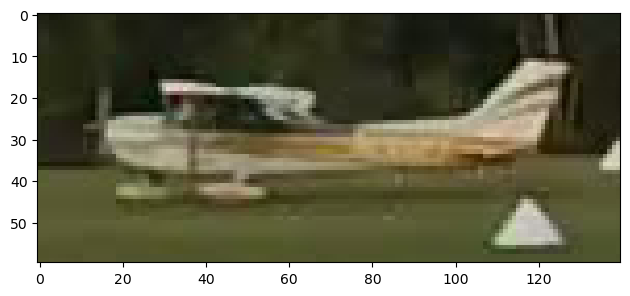

In [9]:
this_imname = ci_path + '2017-08-25T23+24+13_390Z.png'
io.imshow(io.imread(this_imname))

# function to process raw images, resulting in training and test datasets

In [10]:
# function that takes raw images and completes all preprocessing required before model fits
def process_raw_data(labels_fn, images_fp, my_random_seed, imview=False, test=False):
    plane_data = pd.read_csv(labels_fn) # read in photograph labels
    print("First few lines of image labels: ")
    print(plane_data.head())
    print("Size of image label dataFrame: ")
    print(plane_data.shape)
        
    # construct lists for features, labels, and a crosswalk reference to image names
    features_list = []
    if (not test):
        y_list = []
    imnames_list = []

    for index, row in plane_data.iterrows():
        features_list.append(image_manipulation(row['img_name'], images_fp))
        if (not test):
            y_list.append(row['plane'])
        imnames_list.append(row['img_name'])
    
    # convert the lists to ndarrays
    features = np.asarray(features_list)
    if (not test):
        Y = np.asarray(y_list)
    imgs = np.asarray(imnames_list)
    print('Shape of original feature representation: ')
    print(features.shape)

    # flatten the images ndarray to one row per image
    features_flat = features.reshape((features.shape[0], -1))

    print('Shape of flat feature representation: ')
    print(features_flat.shape)

    if (not test):
        print('Shape of Y: ')
        print(Y.shape)

        print('Number of images with planes: ')
        print(Y.sum())
    
        # create train and test sets
        data_train, data_test, y_train, y_test, imgs_train, imgs_test = train_test_split(features_flat, 
            Y, imgs, test_size = 0.25, random_state = my_random_seed)

        print('Shape of training set: ')
        print(y_train.shape)
        print('Number of training images that contain an airplane: ')
        print(y_train.sum())

        print('Shape of test set: ')
        print(y_test.shape)
        print('Number of test images that contain an airplane: ')
        print(y_test.sum())
    
    if (test):
        X_submission_test = features_flat
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(X_submission_test, plane_data)
    else: 
        print("Shape of data_train and data_test:")
        print(data_train.shape)
        print(data_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of imgs_train and imgs_test:")
        print(imgs_train.shape)
        print(imgs_test.shape)
        print('SUCCESS!')
        return(data_train, data_test, y_train, y_test, imgs_train, imgs_test)


In [11]:
data_train, data_test, y_train, y_test, imgs_train, imgs_test = process_raw_data(l_file, ci_path, 
    my_random_seed=99, imview=False, test=False)

First few lines of image labels: 
                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
Size of image label dataFrame: 
(6758, 2)


Shape of original feature representation: 
(6758, 60, 140)
Shape of flat feature representation: 
(6758, 8400)
Shape of Y: 
(6758,)
Number of images with planes: 
101
Shape of training set: 
(5068,)
Number of training images that contain an airplane: 
80
Shape of test set: 
(1690,)
Number of test images that contain an airplane: 
21
Shape of data_train and data_test:
(5068, 8400)
(1690, 8400)
Shape of y_train and y_test:
(5068,)
(1690,)
Shape of imgs_train and imgs_test:
(5068,)
(1690,)
SUCCESS!


# train Perceptron

In [12]:
# MODEL: Perceptron
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(data_train, y_train)

prc_performance = BinaryClassificationPerformance(prc.predict(data_train), y_train, 'prc')
prc_performance.compute_measures()
prc_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(prc_performance.performance_measures)

prc_performance_test = BinaryClassificationPerformance(prc.predict(data_test), y_test, 'prc')
prc_performance_test.compute_measures()
prc_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(prc_performance_test.performance_measures)

prc_performance_test.img_indices()
prc_img_indices_to_view = prc_performance_test.image_indices

TRAINING SET: 
{'Pos': 80, 'Neg': 4988, 'TP': 79, 'TN': 4968, 'FP': 20, 'FN': 1, 'Accuracy': 0.9958563535911602, 'Precision': 0.797979797979798, 'Recall': 0.9875, 'desc': 'prc', 'set': 'train'}
TEST SET: 
{'Pos': 21, 'Neg': 1669, 'TP': 20, 'TN': 1655, 'FP': 14, 'FN': 1, 'Accuracy': 0.9911242603550295, 'Precision': 0.5882352941176471, 'Recall': 0.9523809523809523, 'desc': 'prc', 'set': 'test'}


In [13]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
        warnings.filterwarnings('ignore')    
        plt.figure()
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        io.imshow(data_test[img].reshape(dims[0], dims[1])) # show manipulation for feature representation
        warnings.filterwarnings('always')


# look at examples of Perceptron classifications

## true positives

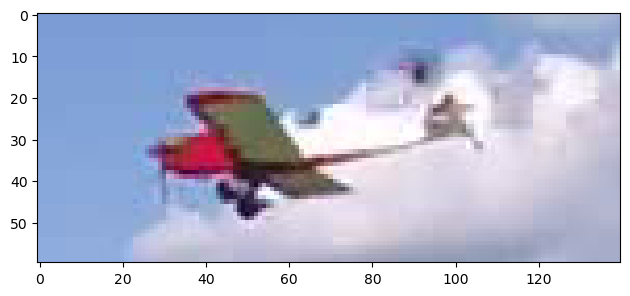

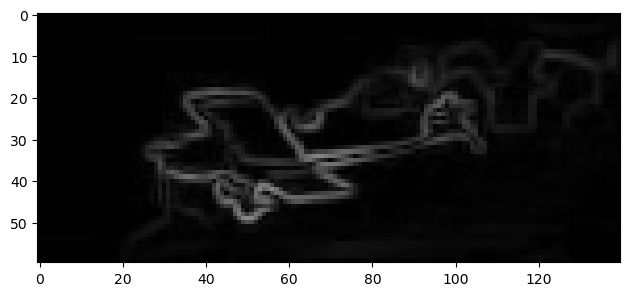

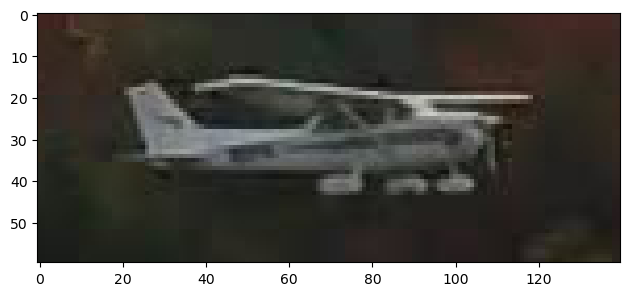

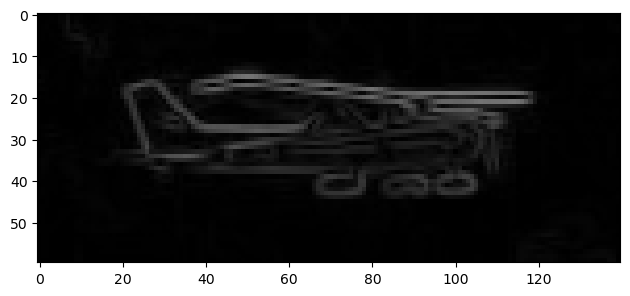

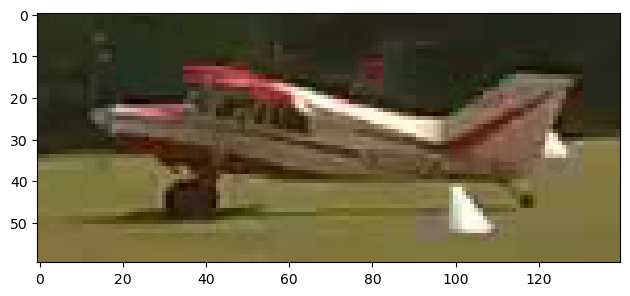

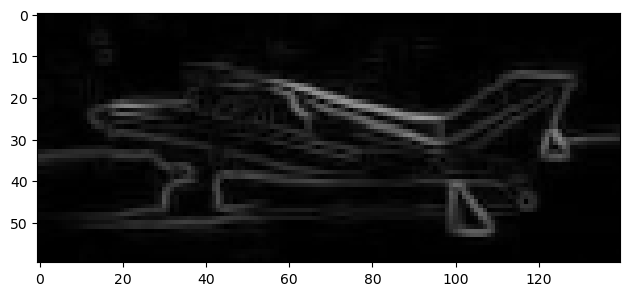

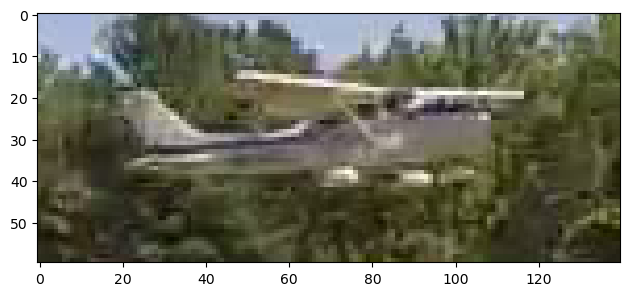

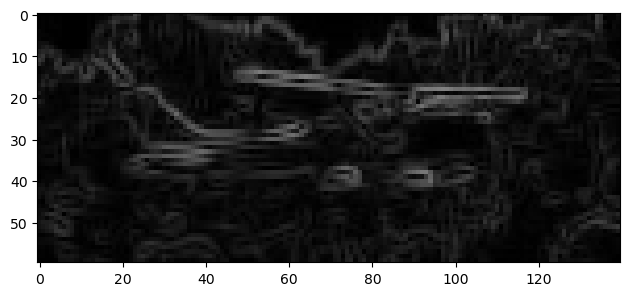

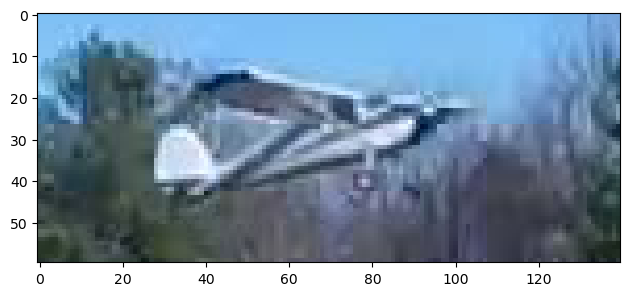

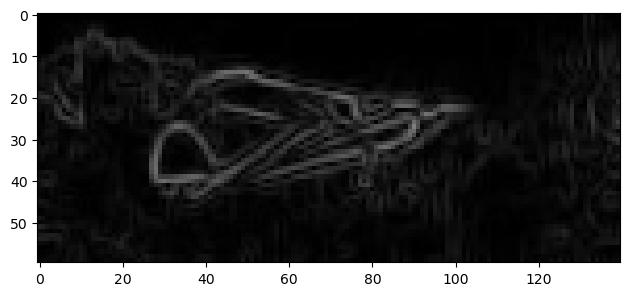

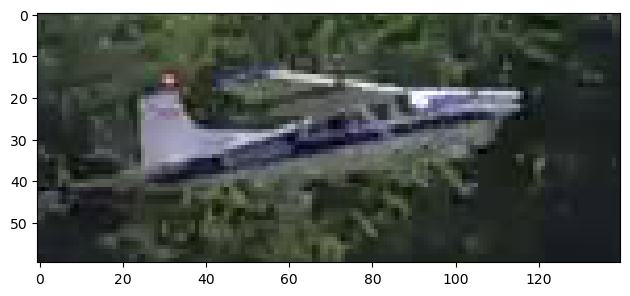

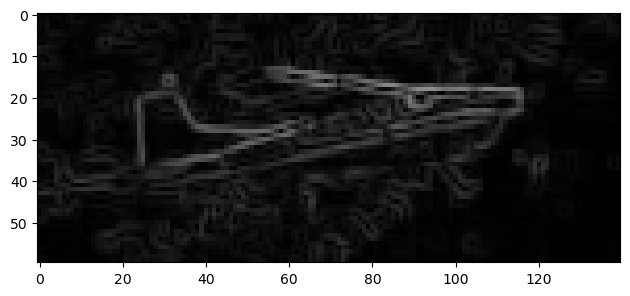

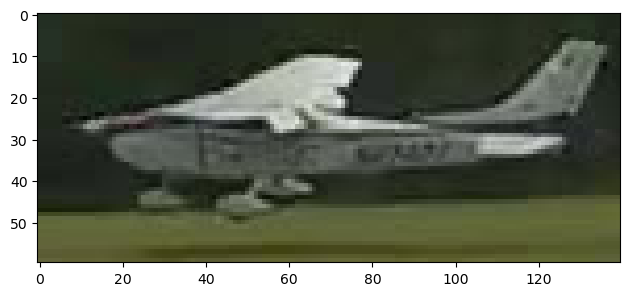

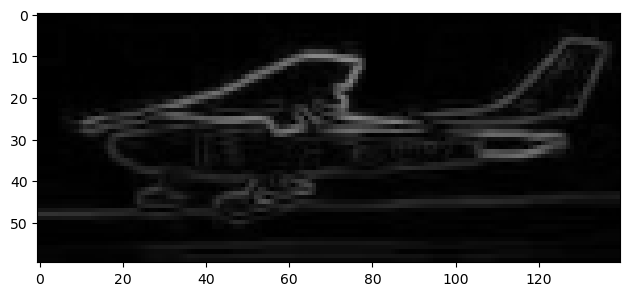

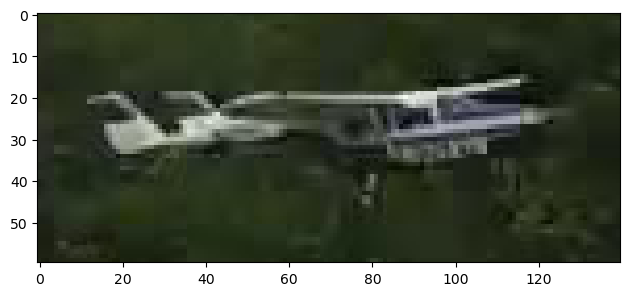

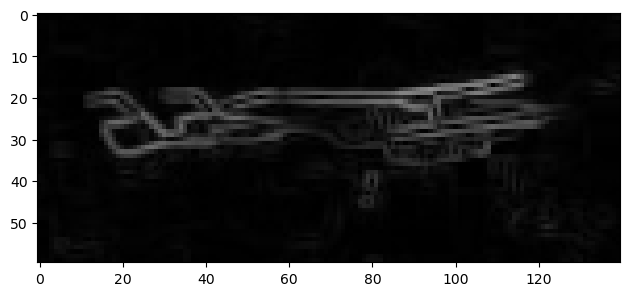

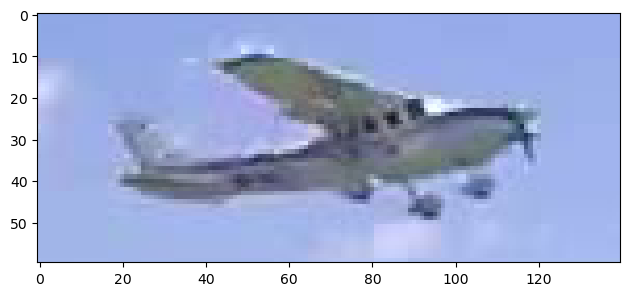

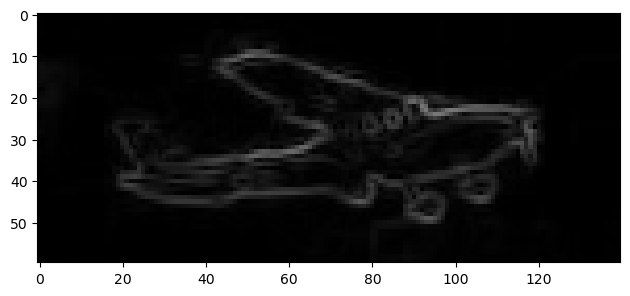

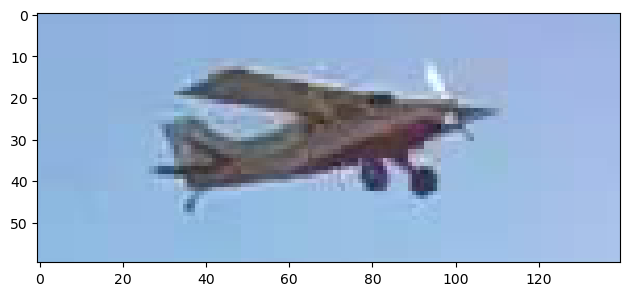

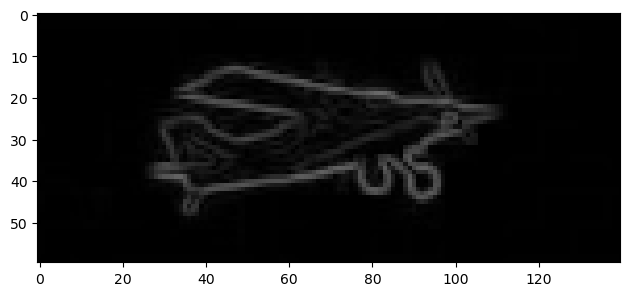

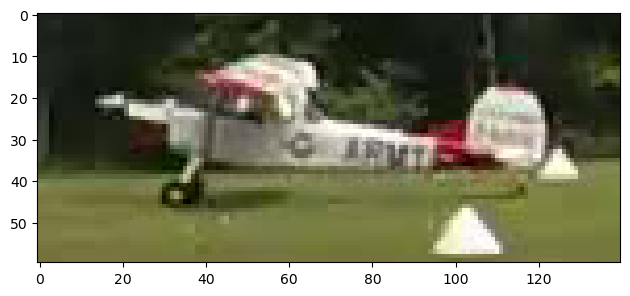

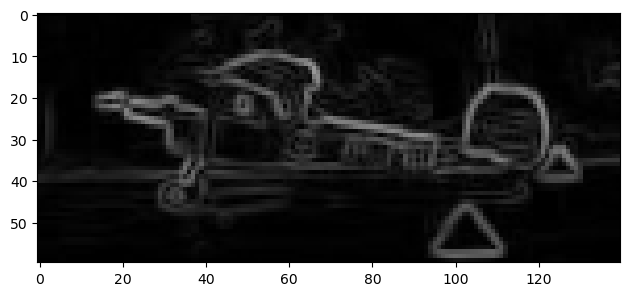

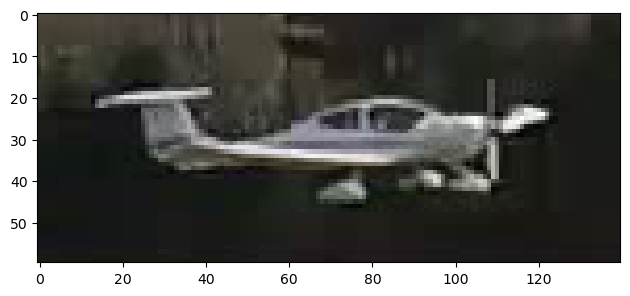

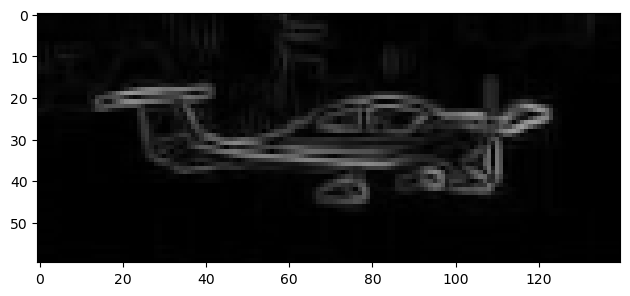

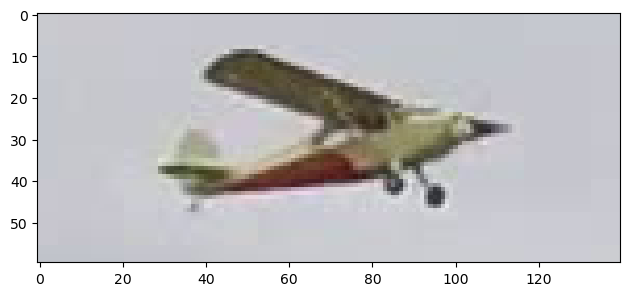

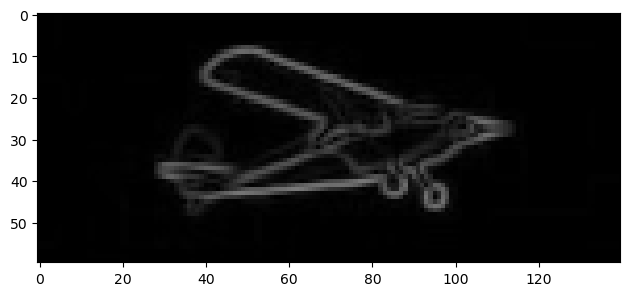

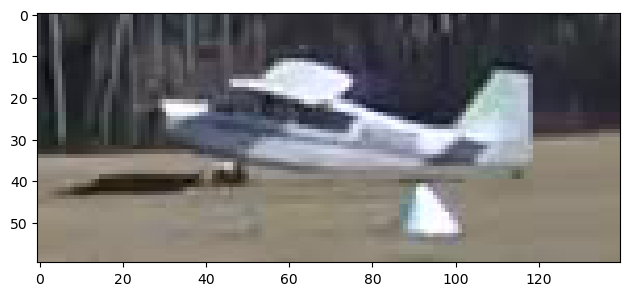

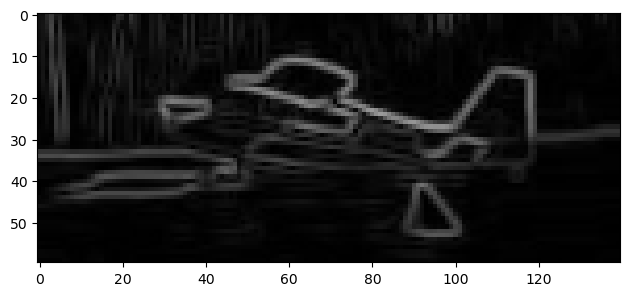

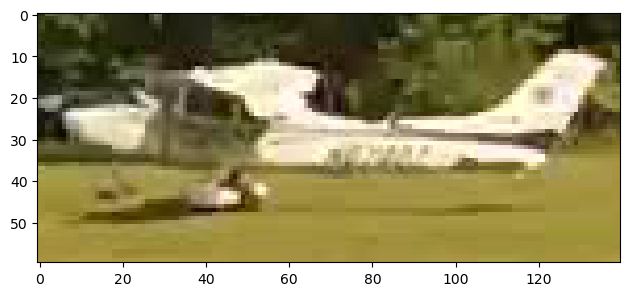

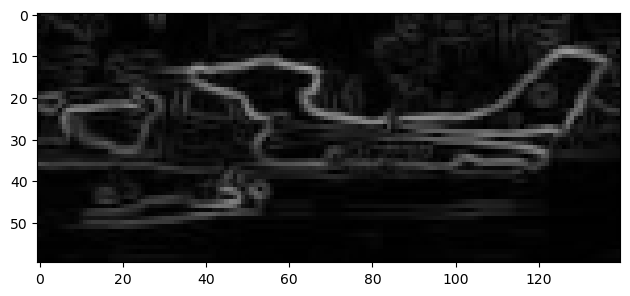

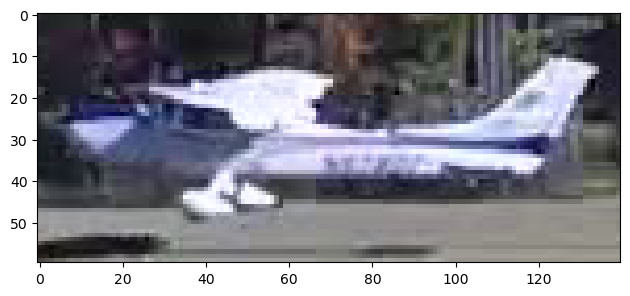

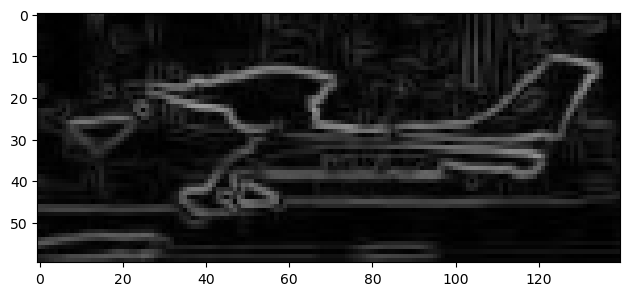

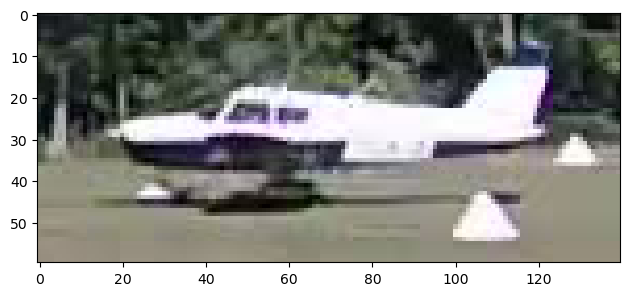

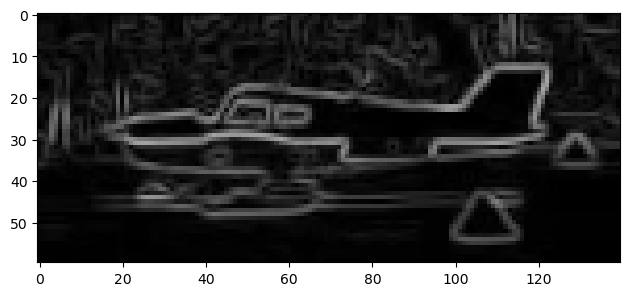

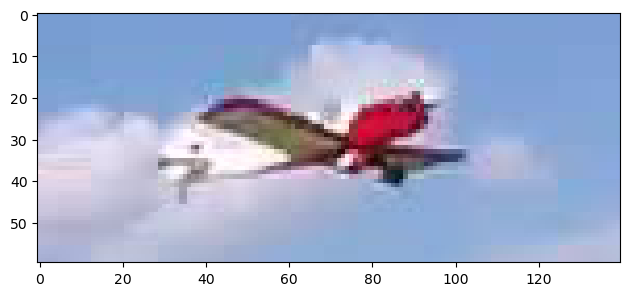

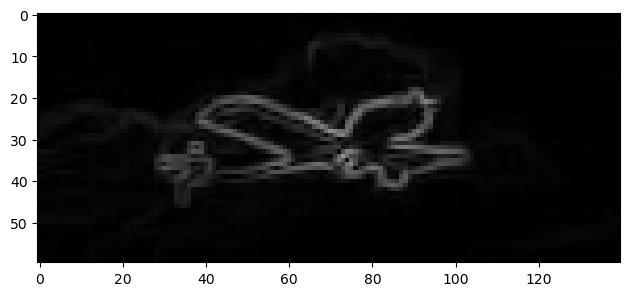

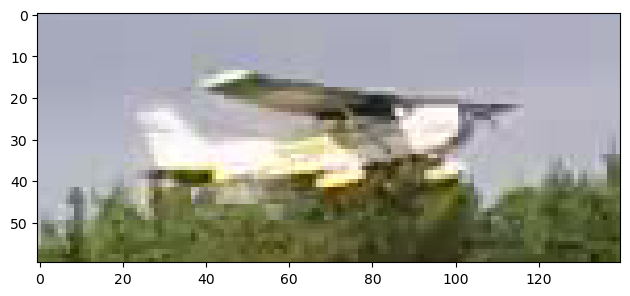

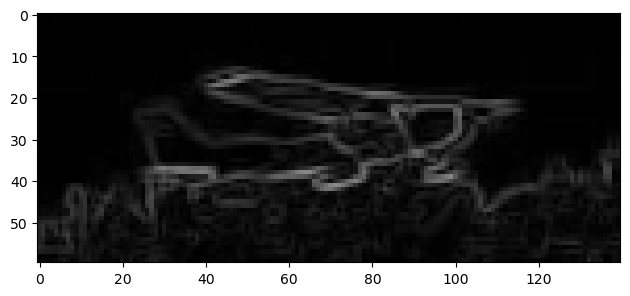

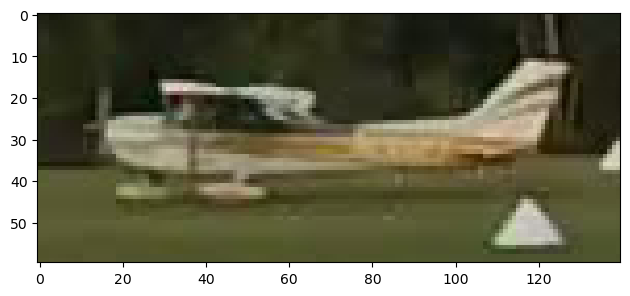

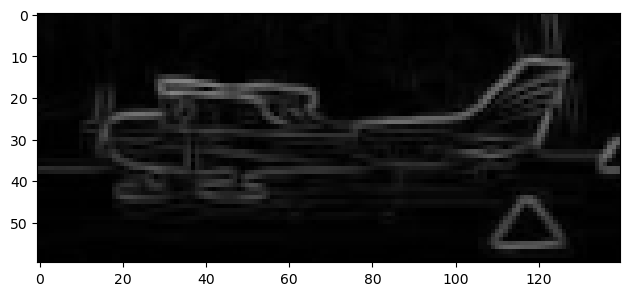

In [14]:
performance_examples('TP', prc_img_indices_to_view)

## false positives

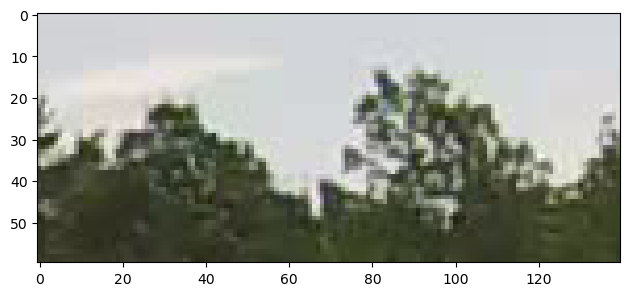

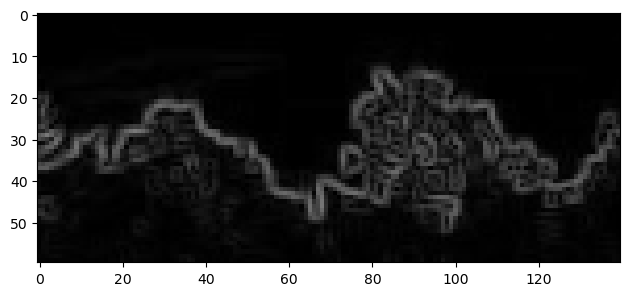

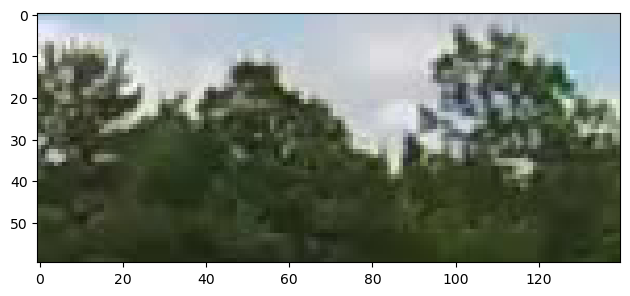

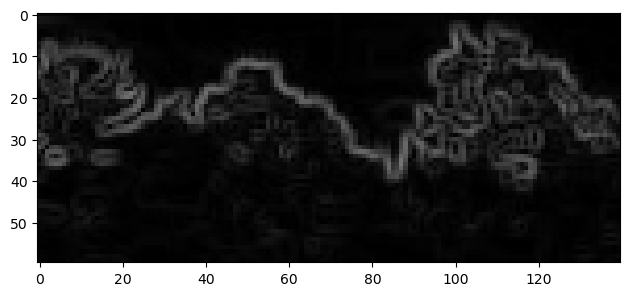

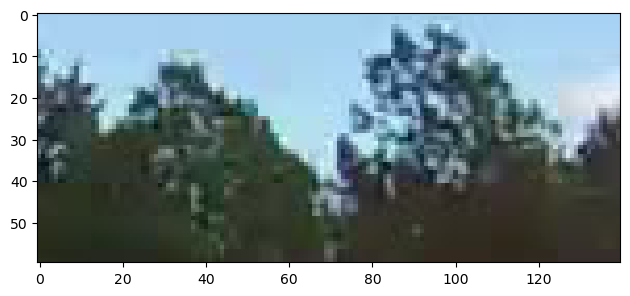

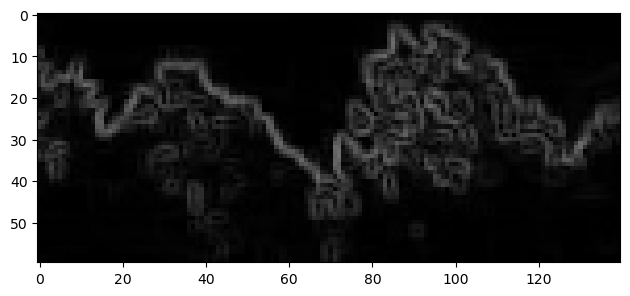

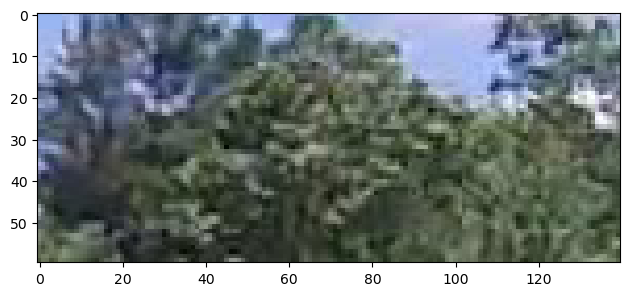

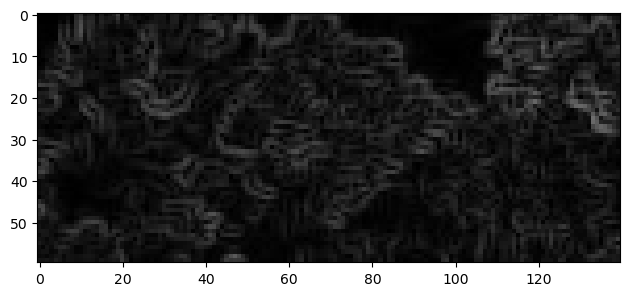

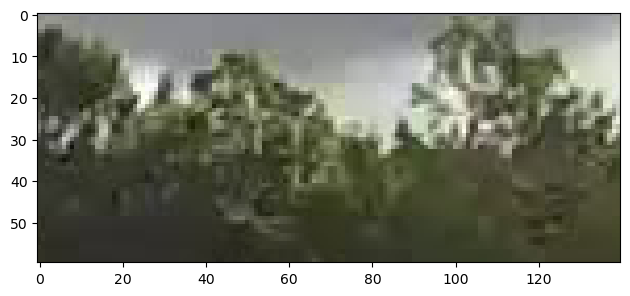

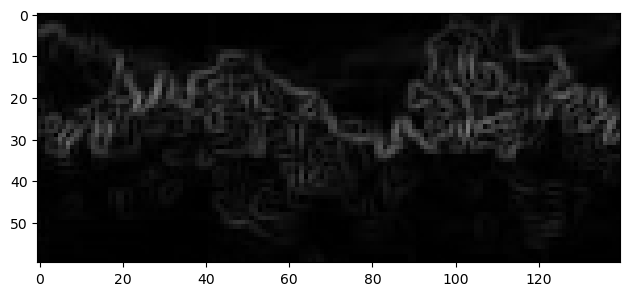

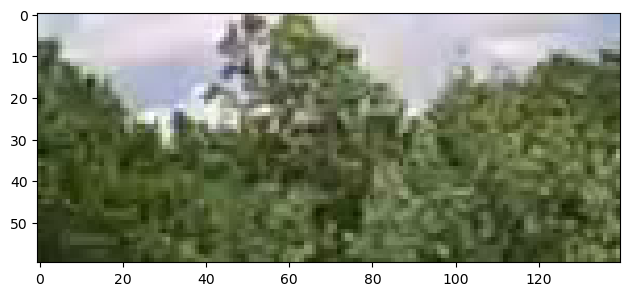

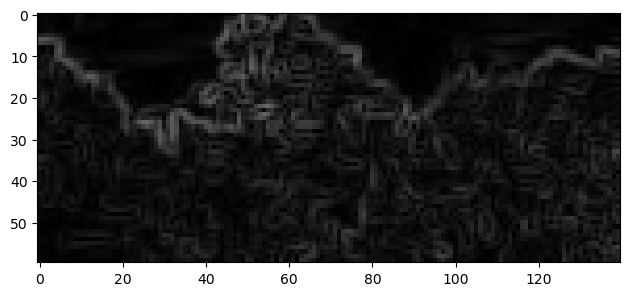

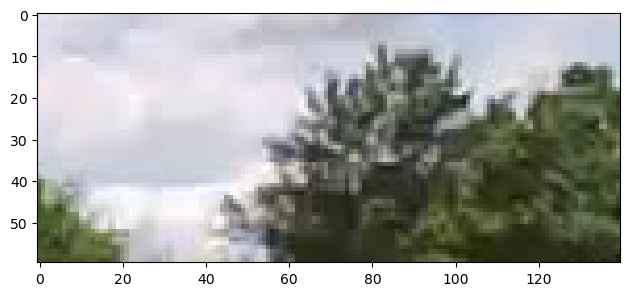

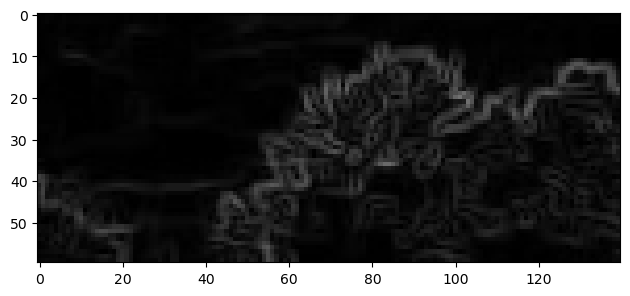

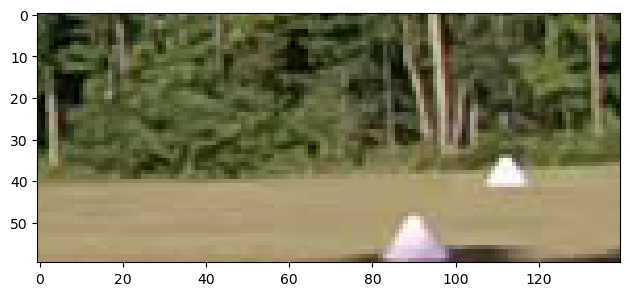

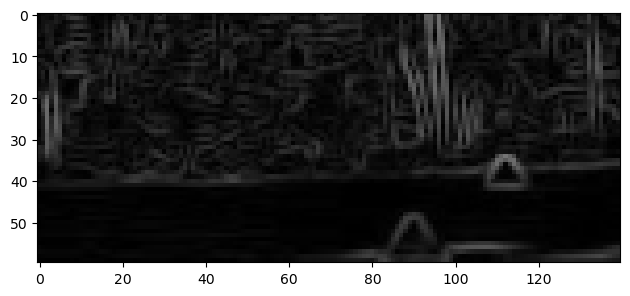

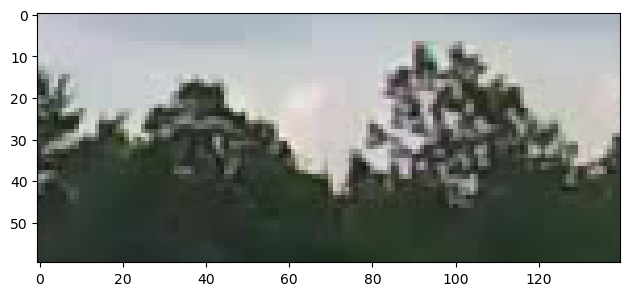

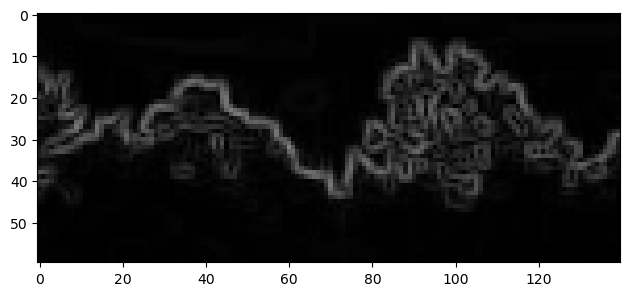

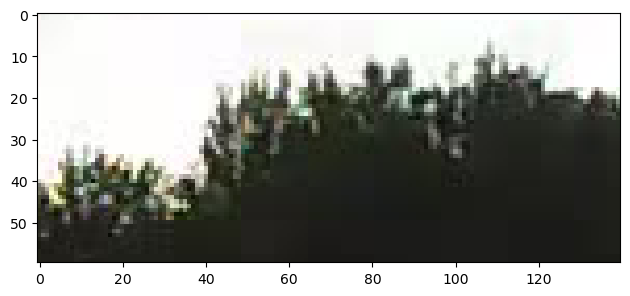

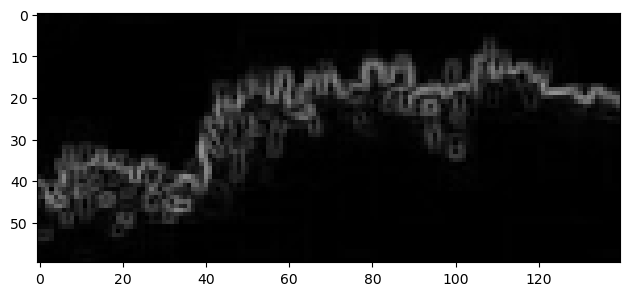

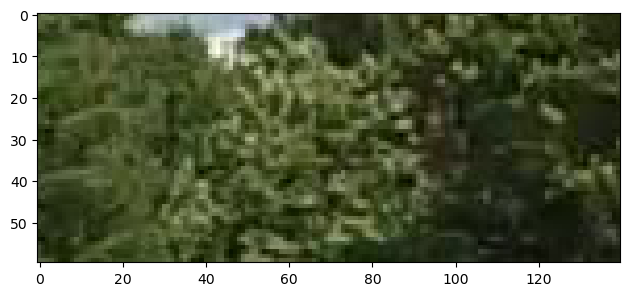

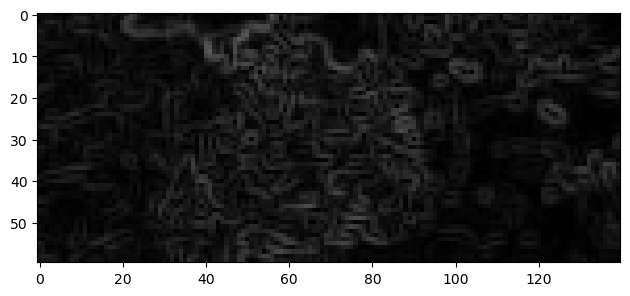

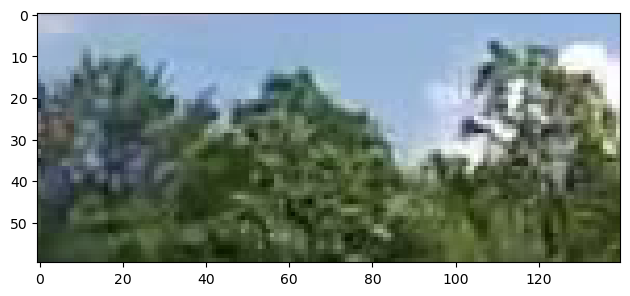

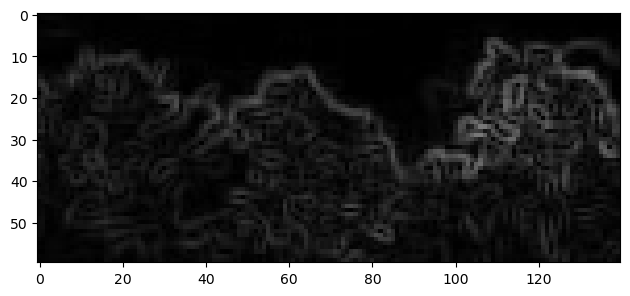

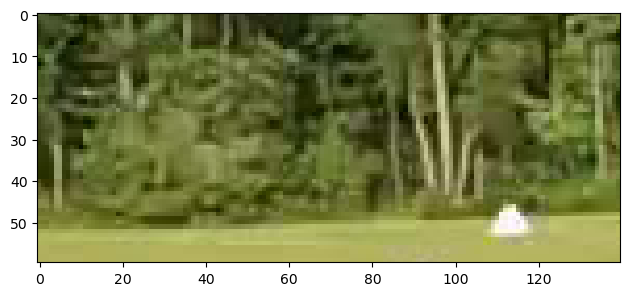

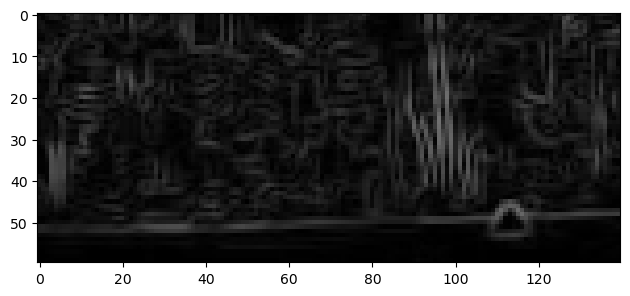

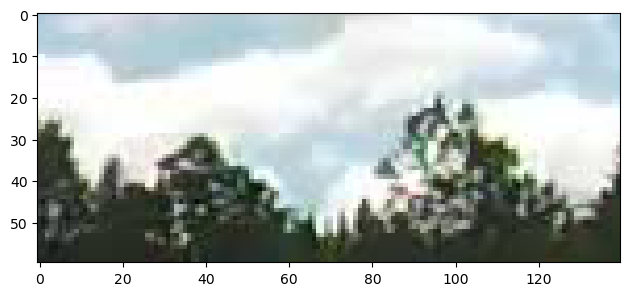

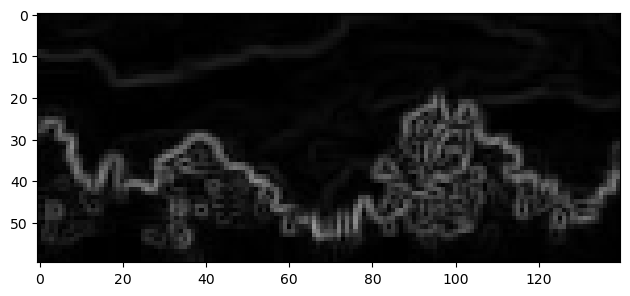

In [15]:
performance_examples('FP', prc_img_indices_to_view)

## false negatives

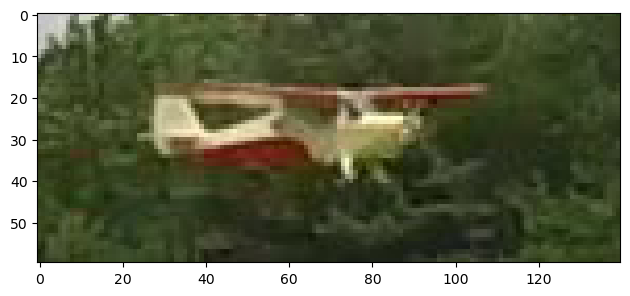

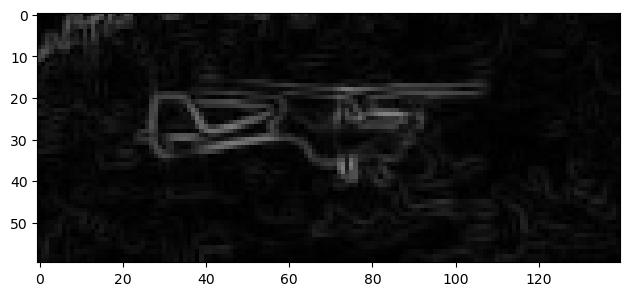

In [16]:
performance_examples('FN', prc_img_indices_to_view)

# train Multilayer Perceptron, a.k.a. neural network

In [52]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
# nn = neural_network.MLPClassifier(hidden_layer_sizes=(100),max_iter=1000)
nn = neural_network.MLPClassifier(hidden_layer_sizes=(30,30), max_iter=1000)
# nn = neural_network.MLPClassifier(hidden_layer_sizes=(30, 30, 10), max_iter=1000)
# nn = neural_network.MLPClassifier(hidden_layer_sizes=(30, 30, 30, 10), max_iter=1000)
# nn = neural_network.MLPClassifier(hidden_layer_sizes=(30, 30, 10, 10, 10, 10), max_iter=1000)
print(nn)
nn.fit(data_train, y_train)

nn_performance = BinaryClassificationPerformance(nn.predict(data_train), y_train, 'nn')
nn_performance.compute_measures()
nn_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn_performance.performance_measures)

nn_performance_test = BinaryClassificationPerformance(nn.predict(data_test), y_test, 'nn_test')
nn_performance_test.compute_measures()
nn_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn_performance_test.performance_measures)

nn_performance_test.img_indices()
nn_img_indices_to_view = nn_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
TRAINING SET: 
{'Pos': 80, 'Neg': 4988, 'TP': 80, 'TN': 4988, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn', 'set': 'train'}
TEST SET: 
{'Pos': 21, 'Neg': 1669, 'TP': 15, 'TN': 1669, 'FP': 0, 'FN': 6, 'Accuracy': 0.9964497041420118, 'Precision': 1.0, 'Recall': 0.7142857142857143, 'desc': 'nn_test', 'set': 'test'}


# look at examples of neural network classifications

## true positives

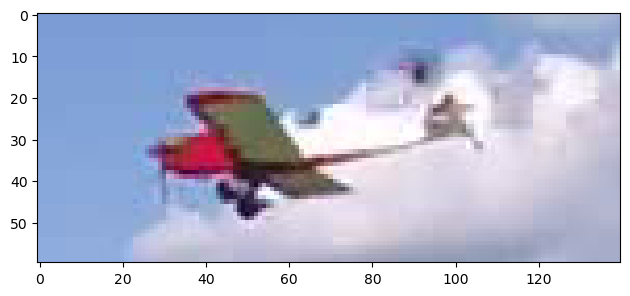

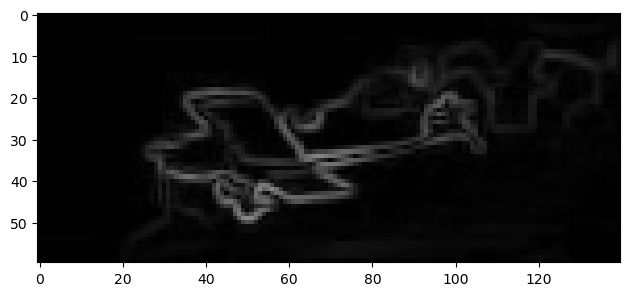

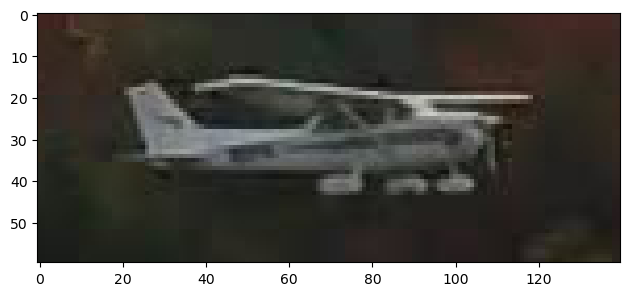

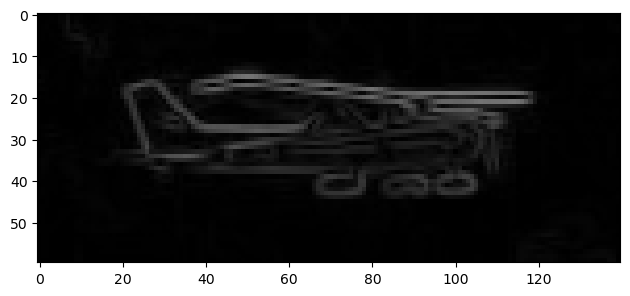

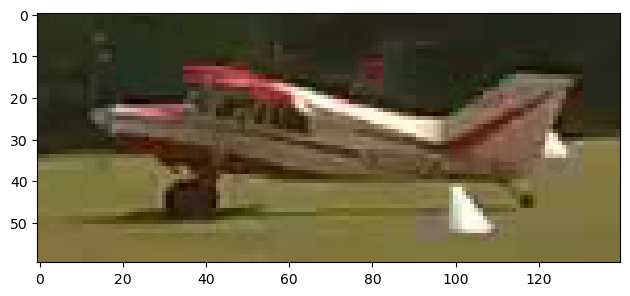

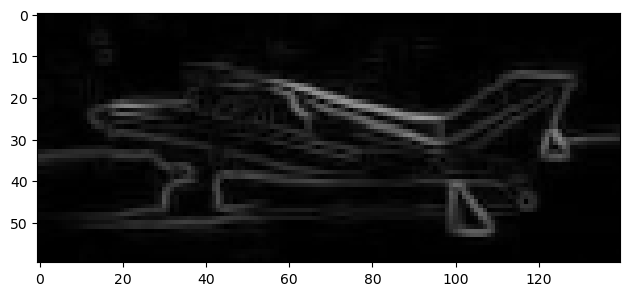

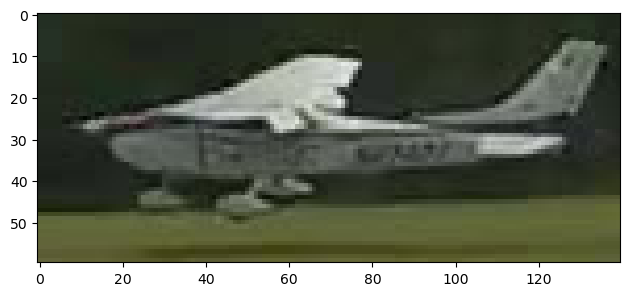

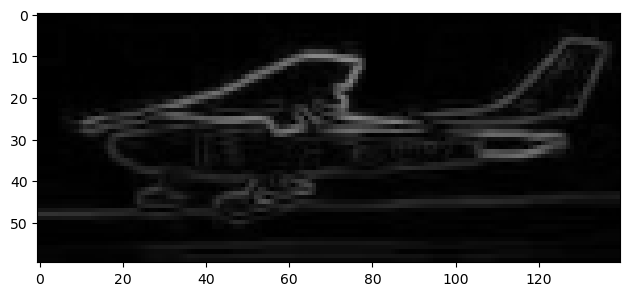

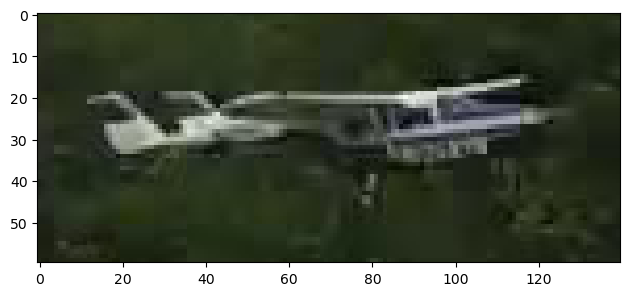

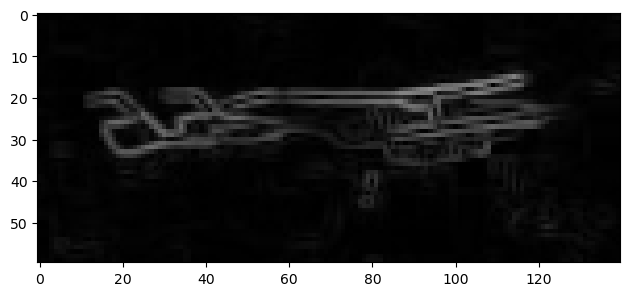

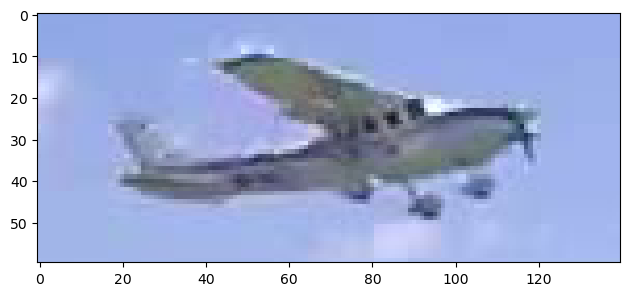

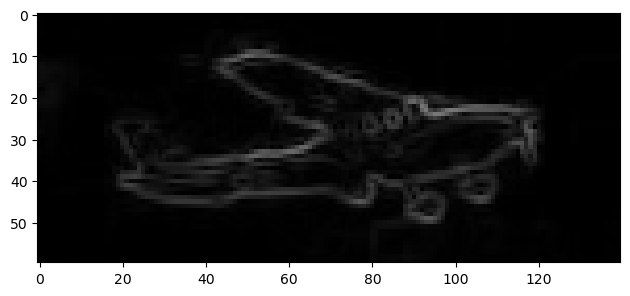

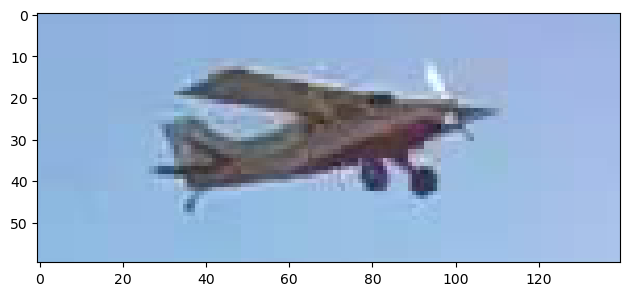

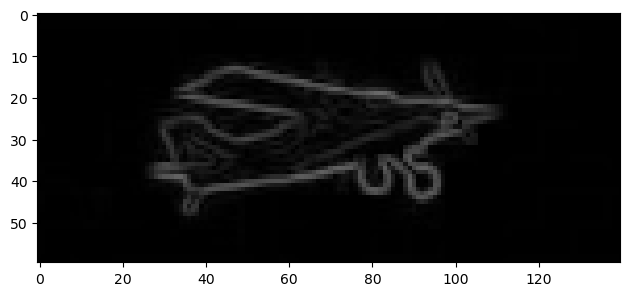

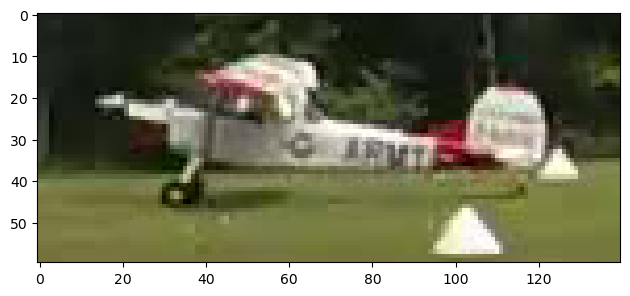

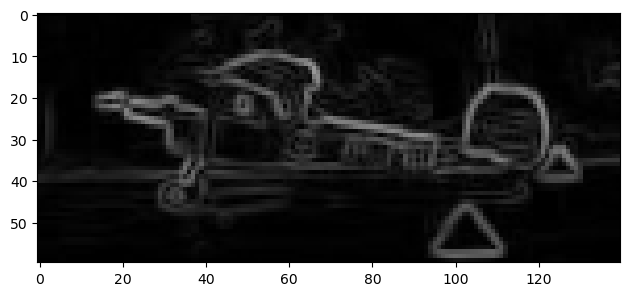

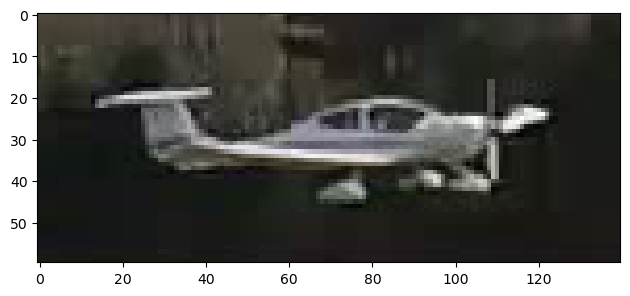

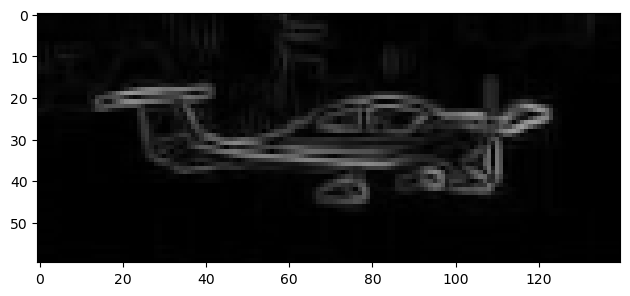

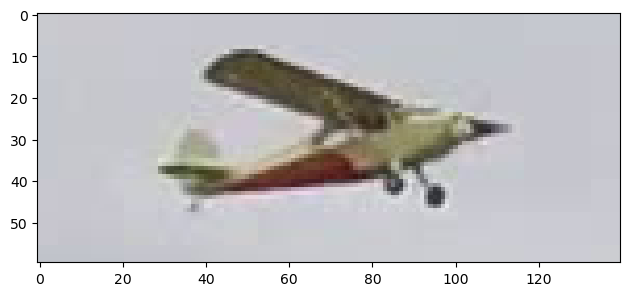

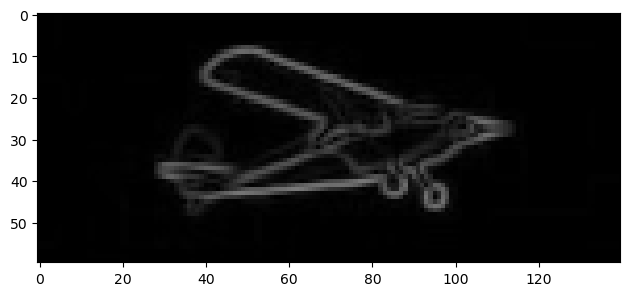

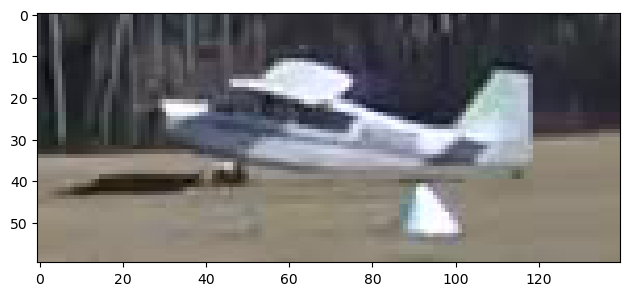

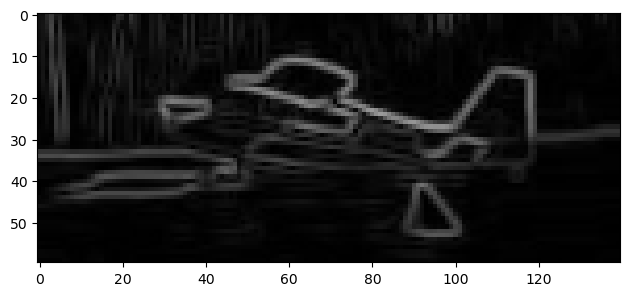

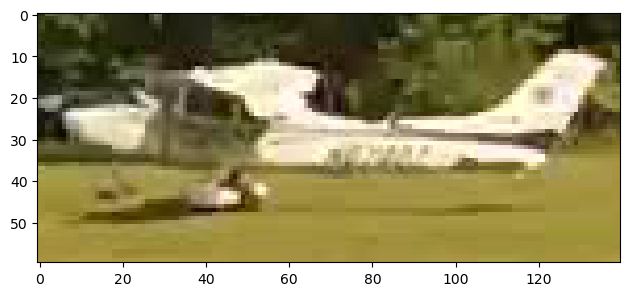

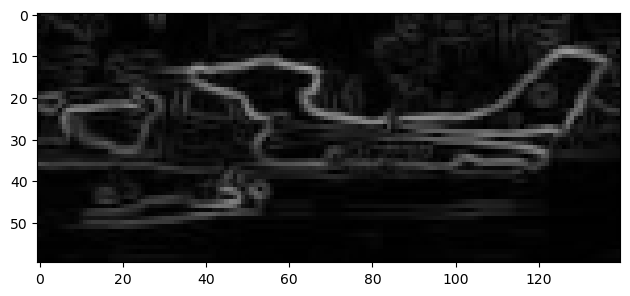

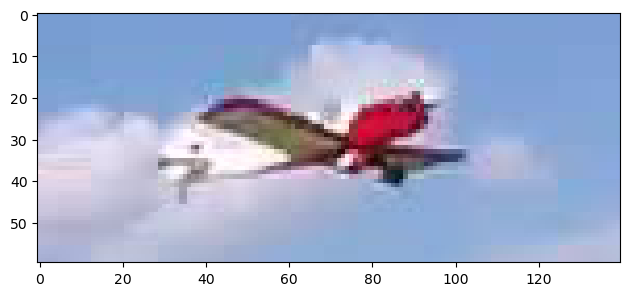

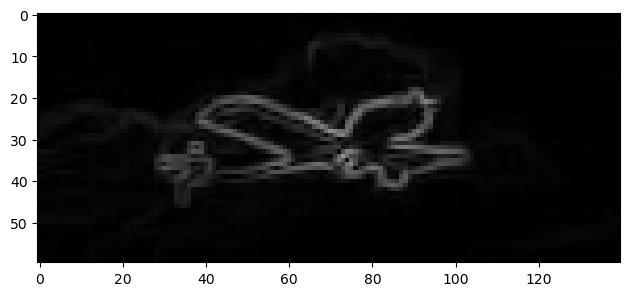

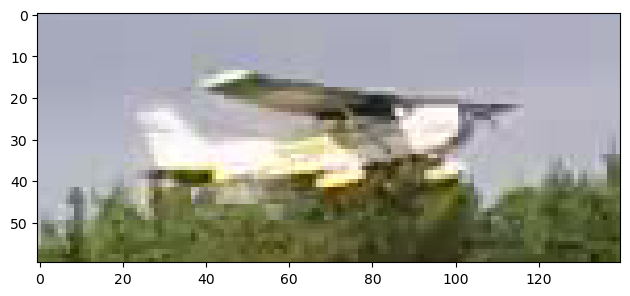

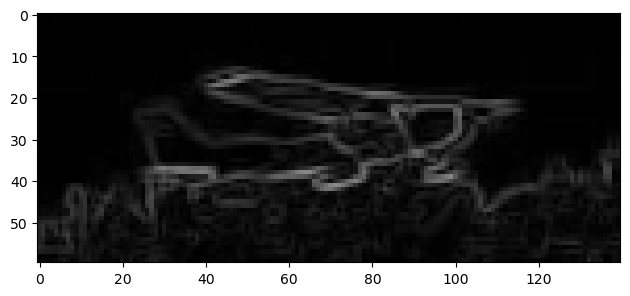

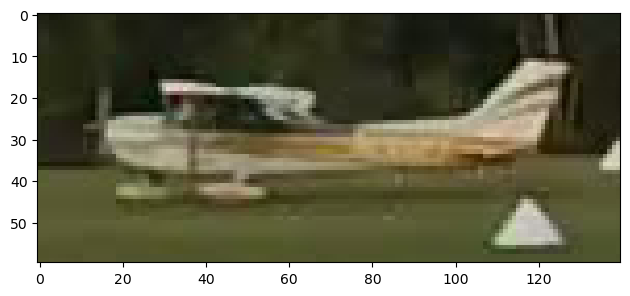

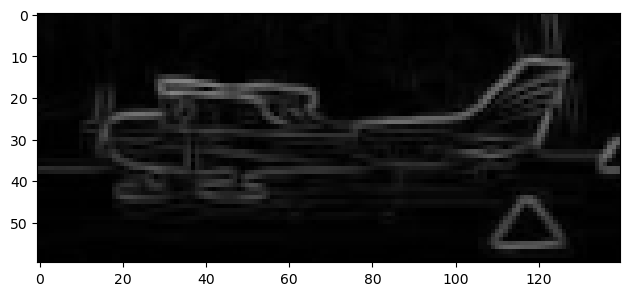

In [28]:
performance_examples('TP', nn_img_indices_to_view)

## false positives

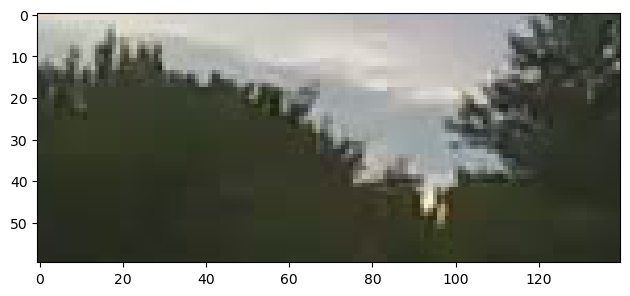

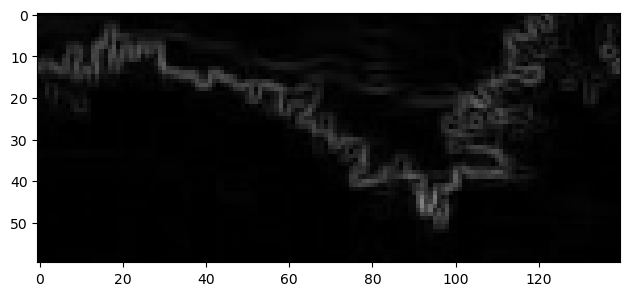

In [29]:
performance_examples('FP', nn_img_indices_to_view)

## false negatives

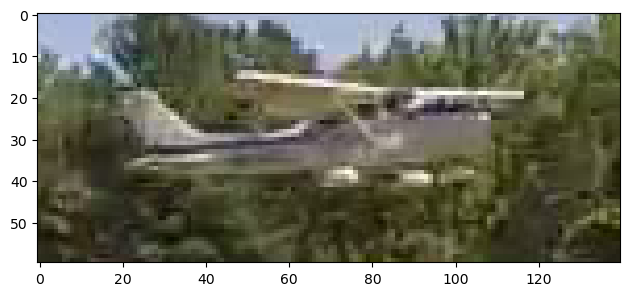

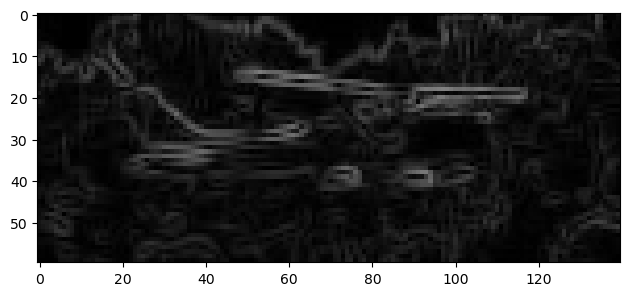

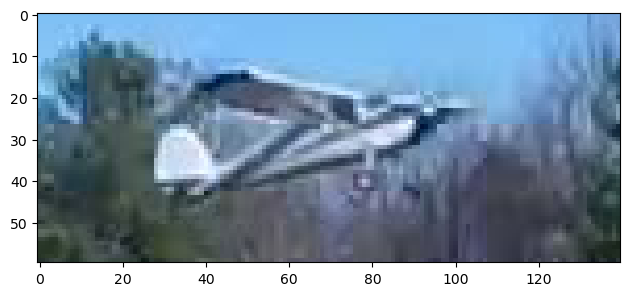

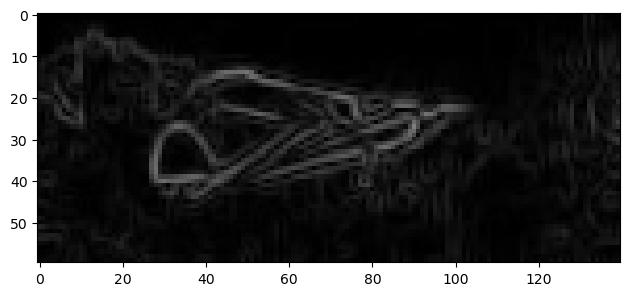

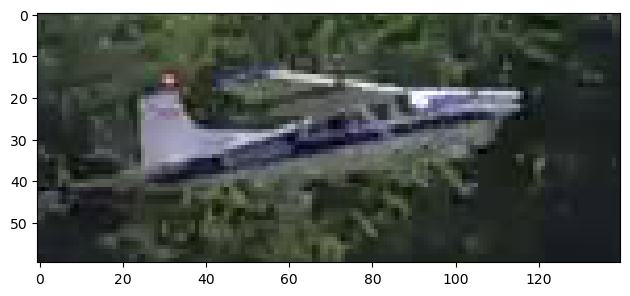

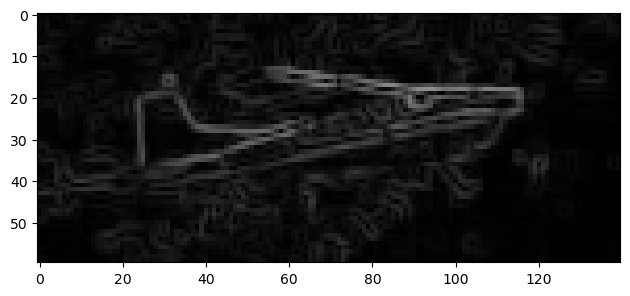

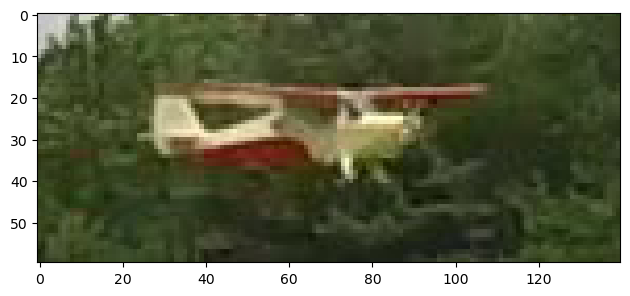

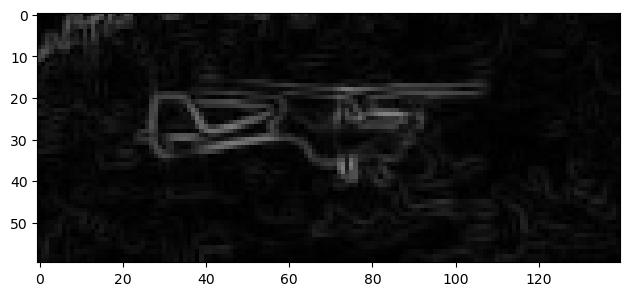

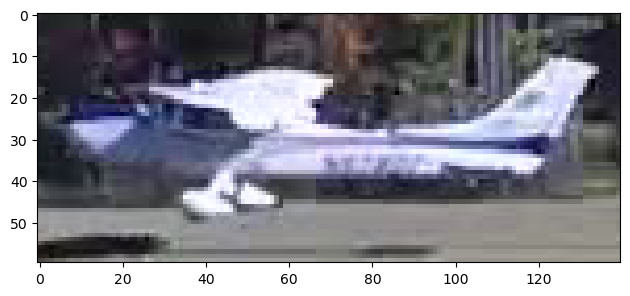

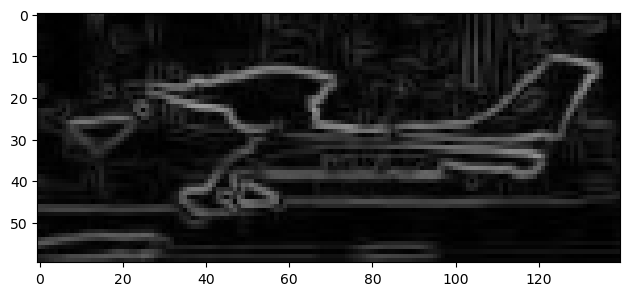

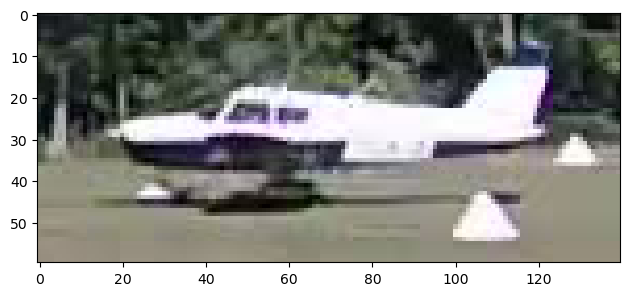

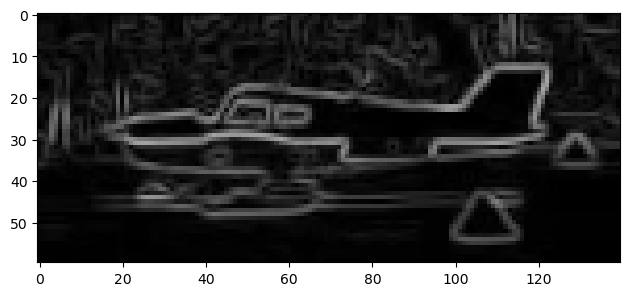

In [30]:
performance_examples('FN', nn_img_indices_to_view)

# comparisons

In [46]:
# list of fits to compare: 
final_fits = []
final_fits.append(prc_performance.performance_measures)
final_fits.append(prc_performance_test.performance_measures)
final_fits.append(nn_performance.performance_measures)
final_fits.append(nn_performance_test.performance_measures)

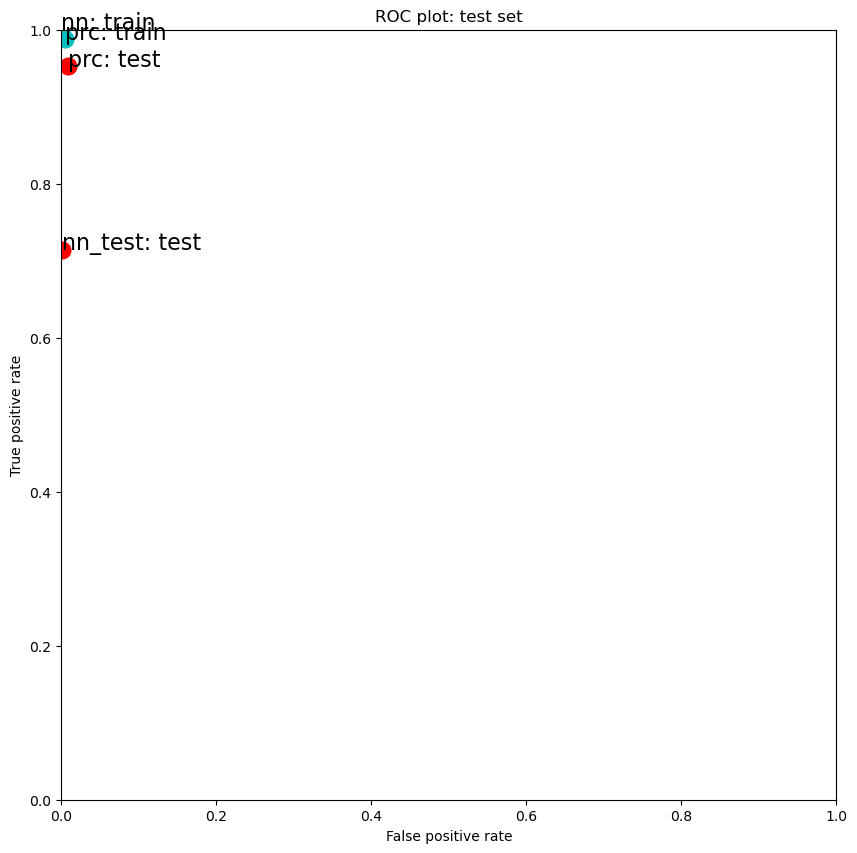

In [47]:
plt.figure(figsize=(10,10))

for fit in final_fits:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


# SUBMISSION

### file paths and names:

In [23]:
# submission_ci_path = 'test_data_for_grading/test_cropped_images/' # file path for cropped images for training
# submission_l_file = 'test_data_for_grading/test_plane_labels.csv' # file path and file name for csv with labels

In [24]:
# X_test_data, X_test_submission = process_raw_data(submission_l_file, submission_ci_path, my_random_seed=74, test=True)
# print("Number of rows in the submission test set (should be 1,523): ")

### IMPORTANT CHECK: make sure that the number of columns in your training data is the same as the number of columns in this test submission!

In [25]:
print(data_train.shape)
print(X_test_data.shape)

(5068, 8400)


NameError: name 'X_test_data' is not defined

Both the training set and submission test set have 525 columns. Success!

---

Choose a *single* model for your submission. In this code, I am choosing the Perceptron model fit, which is in the prc object. But you should choose the model that is performing the best for you!

In [ ]:
# # concatenate predictions to the id
# X_test_submission["prediction"] = prc.predict(X_test_data)
# # look at the proportion of positive predictions
# print(X_test_submission['prediction'].mean())


This is the proportion of predictions that have predicted that there is an airplane in the image.

In [ ]:
print(X_test_submission.shape) # should be (1523, 2)

(1523, 2)


In [ ]:
# export submission file as pdf
# CHANGE FILE PATH: 
X_test_submission.to_csv('airplane_submission.csv', index=False)